# 红酒数据分析
##介绍

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline

# print(np.random.random((3,4)))
# print(np.linspace(1,10,5))

#color
color = sns.color_palette()
print(len(color))
# plt.plot(range(10),'o',c=list(color) )
#precision
pd.set_option('precision',3)


10


In [21]:
df = pd.read_table('/Users/zp/Desktop/data_mining/Tianchi/redWine/winequality-red.csv',sep=';')
print(df.head())
print(df.info())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0    0.998  3.51       0.56   
1                 25.0                  67.0    0.997  3.20       0.68   
2                 15.0                  54.0    0.997  3.26       0.65   
3                 17.0                  60.0    0.998  3.16       0.58   
4                 11.0                  34.0    0.998  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


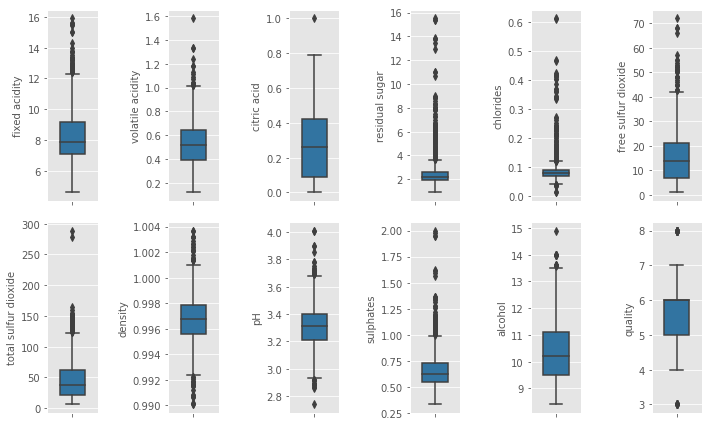

In [38]:
plt.style.use('ggplot')
columns = df.columns.tolist()
print(columns)
# plt.boxplot(df[columns[0]])
# plt.show()
fig = plt.figure(figsize=(10,6))
for i in range(12):
    plt.subplot(2,6,i+1)
    sns.boxplot(df[columns[i]],orient='v',color=color[0],width=0.5 )
    plt.ylabel(columns[i],fontsize=10)

plt.tight_layout()


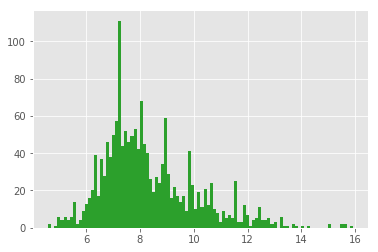

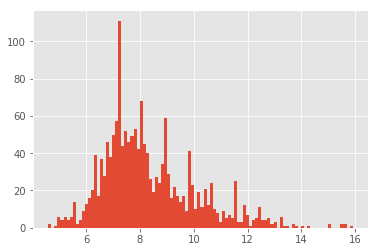

In [52]:
##remember two ways to plot hist
df[columns[0]].hist(bins=100,color=color[2])
plt.show()
plt.hist(np.array(df[columns[0]]),bins=100)
plt.show()

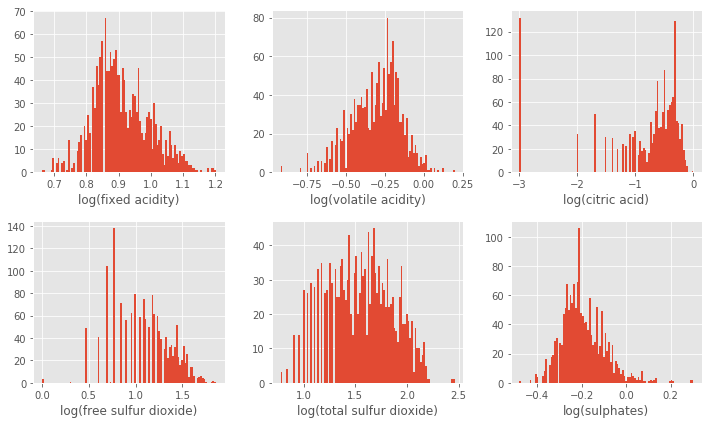

In [72]:
acidityFeat = ['fixed acidity', 'volatile acidity', 'citric acid',
               'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']
fig = plt.figure(figsize=(10,6))

for i in range(6):
    ax = plt.subplot(2,3,i+1)
    v = np.log10( np.clip( df[acidityFeat[i]].values ,a_min=0.001, a_max=None) )
    plt.hist(v,bins=50)
    plt.xlabel('log(' + acidityFeat[i] +')')
    
plt.tight_layout()


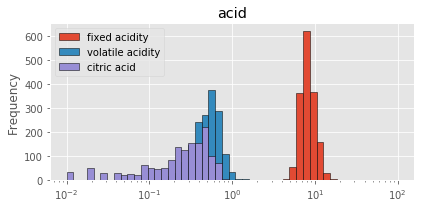

In [93]:
bins = 10**np.linspace(-2,2)

fig = plt.figure(figsize=(6,3))
plt.hist( df[acidityFeat[0]].values,bins=bins,edgecolor='k',label=acidityFeat[0] )
plt.hist( df[acidityFeat[1]].values, bins=bins,edgecolor='k',label=acidityFeat[1])
plt.hist( df[acidityFeat[2]].values, bins=bins,edgecolor='k',label=acidityFeat[2] )
plt.xscale('log')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('acid')
plt.legend(loc='best')
plt.tight_layout()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0    0.998  3.51       0.56   
1                 25.0                  67.0    0.997  3.20       0.68   
2                 15.0                  54.0    0.997  3.26       0.65   
3                 17.0                  60.0    0.998  3.16       0.58   
4                 11.0                  34.0    0.998  3.51       0.56   

   alcohol  quality  total  
0      9.4        5   8.10  
1      9.8        5   8.68  

(array([  3.,   2.,   3.,   5.,   6.,   4.,   7.,  14.,   9.,  14.,  22.,
         22.,  37.,  34.,  65.,  71.,  94., 102.,  76.,  92.,  86.,  68.,
         81.,  68.,  55.,  72.,  59.,  47.,  36.,  32.,  58.,  32.,  39.,
         32.,  20.,  16.,  24.,  18.,  20.,  12.,  12.,   9.,   8.,   2.,
          3.,   1.,   2.,   0.,   2.,   3.]),
 array([1.66203036, 1.68550689, 1.70898342, 1.73245996, 1.75593649,
        1.77941302, 1.80288955, 1.82636608, 1.84984261, 1.87331914,
        1.89679567, 1.9202722 , 1.94374873, 1.96722526, 1.99070179,
        2.01417833, 2.03765486, 2.06113139, 2.08460792, 2.10808445,
        2.13156098, 2.15503751, 2.17851404, 2.20199057, 2.2254671 ,
        2.24894363, 2.27242016, 2.2958967 , 2.31937323, 2.34284976,
        2.36632629, 2.38980282, 2.41327935, 2.43675588, 2.46023241,
        2.48370894, 2.50718547, 2.530662  , 2.55413854, 2.57761507,
        2.6010916 , 2.62456813, 2.64804466, 2.67152119, 2.69499772,
        2.71847425, 2.74195078, 2.76542731, 2.

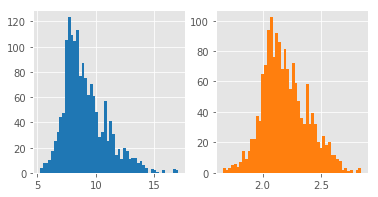

In [99]:
print(df[:5])
df['total'] = df[acidityFeat[0]] + df[acidityFeat[1]] + df[acidityFeat[2]]
fig = plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(df['total'],bins=50,color=color[0])
plt.subplot(1,2,2)
plt.hist(np.log(df['total']),bins=50,color=color[1])

(array([  3.,   2.,   3.,   5.,   6.,   4.,   7.,  14.,   9.,  14.,  22.,
         22.,  37.,  34.,  65.,  71.,  94., 102.,  76.,  92.,  86.,  68.,
         81.,  68.,  55.,  72.,  59.,  47.,  36.,  32.,  58.,  32.,  39.,
         32.,  20.,  16.,  24.,  18.,  20.,  12.,  12.,   9.,   8.,   2.,
          3.,   1.,   2.,   0.,   2.,   3.]),
 array([1.66203036, 1.68550689, 1.70898342, 1.73245996, 1.75593649,
        1.77941302, 1.80288955, 1.82636608, 1.84984261, 1.87331914,
        1.89679567, 1.9202722 , 1.94374873, 1.96722526, 1.99070179,
        2.01417833, 2.03765486, 2.06113139, 2.08460792, 2.10808445,
        2.13156098, 2.15503751, 2.17851404, 2.20199057, 2.2254671 ,
        2.24894363, 2.27242016, 2.2958967 , 2.31937323, 2.34284976,
        2.36632629, 2.38980282, 2.41327935, 2.43675588, 2.46023241,
        2.48370894, 2.50718547, 2.530662  , 2.55413854, 2.57761507,
        2.6010916 , 2.62456813, 2.64804466, 2.67152119, 2.69499772,
        2.71847425, 2.74195078, 2.76542731, 2.

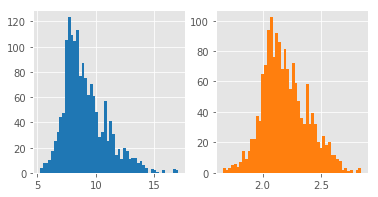

In [105]:
fig = plt.figure(figsize=(6,3))
# plt.subplot(1,2,1)
ax1 = fig.add_subplot(1,2,1)
ax1.hist(df['total'],bins=50,color=color[0])
ax2 = fig.add_subplot(1,2,2)
ax2.hist(np.log(df['total']),bins=50,color=color[1])


In [ ]:
print(df.describe())
df['sweetness'] = pd.cut(df['residual sugar'],bins=[0,4,12,45],labels=['dry','medium','semi'])
print(df.head())
fig = plt.figure( )
plt.hist(df['sweetness'],bins=5)
plt.show()

In [ ]:
print('zp')